In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
    allow_growth=True
    ))

In [2]:
# 検出したボールとゴールの座標が含まれたデータ

r_path = '../data/LOG_G/detect_ball_goal/stable/'
contents = os.listdir(r_path)
data = pd.DataFrame()
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])
d = data

../data/LOG_G/detect_ball_goal/stable/log201808211940.csv
../data/LOG_G/detect_ball_goal/stable/log201808211918.csv
../data/LOG_G/detect_ball_goal/stable/log201808211922.csv
../data/LOG_G/detect_ball_goal/stable/log201808211932.csv
../data/LOG_G/detect_ball_goal/stable/log201808211911.csv
../data/LOG_G/detect_ball_goal/stable/log201808211927.csv
../data/LOG_G/detect_ball_goal/stable/log201808211929.csv
../data/LOG_G/detect_ball_goal/stable/log201808211839.csv
../data/LOG_G/detect_ball_goal/stable/log201808211844.csv
../data/LOG_G/detect_ball_goal/stable/log201808211909.csv
../data/LOG_G/detect_ball_goal/stable/log201808211916.csv
../data/LOG_G/detect_ball_goal/stable/log201808201609.csv
../data/LOG_G/detect_ball_goal/stable/log201808211935.csv


In [3]:
# ブレることなくボールをゴールに運んだデータ
'''
target_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'
data = pd.read_csv(target_path,header=None)

print(data)
d = data
#print(ball)
#print(joy)
'''

"\ntarget_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'\ndata = pd.read_csv(target_path,header=None)\n\nprint(data)\nd = data\n#print(ball)\n#print(joy)\n"

In [4]:
d.columns = ['d_bx','d_by','d_gx','d_gy','l_bx','l_by','l_p0x','l_p0y','lp1x','l_p1y','g_bx','g_by','g_pole0x','g_pole0y','g_pole1x','g_pole1y','g_px','g_py','g_pth','ljx','ljy','rjx','rjy']
d = d[d.d_bx!=-9999]

In [5]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [6]:
from sklearn.cross_validation import train_test_split

IN_size = 4
TAR_size = 3
'''
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18
'''
d_ball = np.array(d.iloc[:,0:2])   #  0, 1
d_goal = np.array(d.iloc[:,2:4])  #  2, 3
l_ball = np.array(d.iloc[:,4:6])   #  4, 5
l_pole0 = np.array(d.iloc[:,6:8]) #  6, 7
l_pole1 = np.array(d.iloc[:,8:10])# 8,9
g_ball = np.array(d.iloc[:,10:12])   #  10, 11
g_pole0 = np.array(d.iloc[:,12:14]) #  12, 13
g_pole1 = np.array(d.iloc[:,14:16])# 14,15
g_pos = np.array(d.iloc[:,16:19])  # 16,17,18
ljoy = np.array(d.iloc[:,19:21])   # 19,20
rjoy = np.array(d.iloc[:,21:23])   # 21,22

input_d = np.array(d.iloc[:,0:IN_size])
output_d = np.array(d.iloc[:,19:22])
print(input_d.shape)
print(output_d.shape)



IN_train, IN_test, TAR_train, TAR_test = train_test_split(input_d,output_d,test_size=0.1,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
IN_train = IN_train/100.0
IN_test = IN_test/100.0
for t in range(10):
    print(IN_train[t])
'''
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
'''

(48610, 4)
(48610, 3)
[ 18.14120361 -11.14122681  45.75882324   2.09739822]
[ 3.18031891  0.35618652 11.03279907 -1.84451782]
[ 3.4345462  -1.1127771  13.65101318  4.31907715]
[ 3.33664154 -0.48990276  7.64495911 -0.3027165 ]
[ 4.51893219 -1.09952736  3.30555969 -6.8874585 ]
[ 8.08660095 -1.58578873 13.31024292 -4.76524017]
[ 6.07533508  0.74151543 23.42205322  8.8613269 ]
[ 5.88555115  0.16093729 22.76656494  4.55852234]
[16.89084351 -7.68813232 30.49804688  8.50957886]
[ 4.70491882 -0.72088745 18.15882324 10.11818176]


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\n'

In [7]:
#　初期化
#sess = tf.Session(config=config)
#test_sess = tf.Session(config=config)

INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [8]:
#hidden_size = [100]
hidden_size = [30,8]
batch_size = 100
iter_size = 200000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize])))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize])))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size])))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size])))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 30), dtype=float32)
Tensor("Relu_1:0", shape=(?, 8), dtype=float32)
Tensor("Add_2:0", shape=(?, 3), dtype=float32)


In [9]:
# 重みのrestore
saver = tf.train.Saver()
sess = tf.Session(config=config)
test_sess = tf.Session(config=config)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(sess, './model.ckpt')
saver.restore(test_sess, './model.ckpt')

INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt


In [10]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
test_loss = tf.losses.mean_squared_error(TARGET,final_output)
opt = tf.train.AdamOptimizer(0.001)
#opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
loss_vec=[]
test_loss_vec=[]
for i in range(iter_size):
    train_rand_index = np.random.choice(len(IN_train), size=batch_size,replace=False)
    train_rand_in = IN_train[train_rand_index]
    train_rand_tar = TAR_train[train_rand_index]
    sess.run(train_step, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar}))
    
    test_rand_index = np.random.choice(len(IN_test), size=batch_size,replace=False)
    test_rand_in = IN_test[test_rand_index]
    test_rand_tar = TAR_test[test_rand_index]
    test_sess.run(train_step, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar})
    test_loss_vec.append(test_sess.run(test_loss, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar}))
    
    if (i+1)%100==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:100, Loss = 9259.931
Generation:200, Loss = 1497.8608
Generation:300, Loss = 419.39517
Generation:400, Loss = 179.67442
Generation:500, Loss = 191.71782
Generation:600, Loss = 94.65969
Generation:700, Loss = 72.28889
Generation:800, Loss = 73.13767
Generation:900, Loss = 47.289738
Generation:1000, Loss = 41.085796
Generation:1100, Loss = 30.000254
Generation:1200, Loss = 24.515686
Generation:1300, Loss = 22.88152
Generation:1400, Loss = 25.786118
Generation:1500, Loss = 13.397729
Generation:1600, Loss = 11.539908
Generation:1700, Loss = 20.458883
Generation:1800, Loss = 9.643961
Generation:1900, Loss = 7.374291
Generation:2000, Loss = 8.655888
Generation:2100, Loss = 6.7329493
Generation:2200, Loss = 4.9230886
Generation:2300, Loss = 6.2551427
Generation:2400, Loss = 5.081596
Generation:2500, Loss = 4.2510133
Generation:2600, Loss = 4.3475785
Generation:2700, Loss = 3.1494353
Generation:2800, Loss = 4.6790895
Generation:2900, Loss = 3.6411903
Generation:3000, Loss = 3.305279

Generation:23400, Loss = 0.07146552
Generation:23500, Loss = 0.06550324
Generation:23600, Loss = 0.06315108
Generation:23700, Loss = 0.06863036
Generation:23800, Loss = 0.07855495
Generation:23900, Loss = 0.06126905
Generation:24000, Loss = 0.06600919
Generation:24100, Loss = 0.07906909
Generation:24200, Loss = 0.0674412
Generation:24300, Loss = 0.06578162
Generation:24400, Loss = 0.065569304
Generation:24500, Loss = 0.063296415
Generation:24600, Loss = 0.085114956
Generation:24700, Loss = 0.06428183
Generation:24800, Loss = 0.06439467
Generation:24900, Loss = 0.06410654
Generation:25000, Loss = 0.06213653
Generation:25100, Loss = 0.0582702
Generation:25200, Loss = 0.06653848
Generation:25300, Loss = 0.060358454
Generation:25400, Loss = 0.06613508
Generation:25500, Loss = 0.06913167
Generation:25600, Loss = 0.066745535
Generation:25700, Loss = 0.064217634
Generation:25800, Loss = 0.06014014
Generation:25900, Loss = 0.06140248
Generation:26000, Loss = 0.06734704
Generation:26100, Loss =

Generation:46000, Loss = 0.060936775
Generation:46100, Loss = 0.062492993
Generation:46200, Loss = 0.0671797
Generation:46300, Loss = 0.07139228
Generation:46400, Loss = 0.06265467
Generation:46500, Loss = 0.067781515
Generation:46600, Loss = 0.0632386
Generation:46700, Loss = 0.06702833
Generation:46800, Loss = 0.060824133
Generation:46900, Loss = 0.06585911
Generation:47000, Loss = 0.10635799
Generation:47100, Loss = 0.06486833
Generation:47200, Loss = 0.11417085
Generation:47300, Loss = 0.056612156
Generation:47400, Loss = 0.06461209
Generation:47500, Loss = 0.06764167
Generation:47600, Loss = 0.0628088
Generation:47700, Loss = 0.06342676
Generation:47800, Loss = 0.07159357
Generation:47900, Loss = 0.065828085
Generation:48000, Loss = 0.06878825
Generation:48100, Loss = 0.061874453
Generation:48200, Loss = 0.06598762
Generation:48300, Loss = 0.06594782
Generation:48400, Loss = 0.061467018
Generation:48500, Loss = 0.07531813
Generation:48600, Loss = 0.059105147
Generation:48700, Loss

Generation:68600, Loss = 0.060339164
Generation:68700, Loss = 0.06009343
Generation:68800, Loss = 0.07231609
Generation:68900, Loss = 0.05916814
Generation:69000, Loss = 0.067503065
Generation:69100, Loss = 0.07346292
Generation:69200, Loss = 0.06458759
Generation:69300, Loss = 0.057111144
Generation:69400, Loss = 0.057056777
Generation:69500, Loss = 0.06414225
Generation:69600, Loss = 0.064218886
Generation:69700, Loss = 0.061947867
Generation:69800, Loss = 0.07190333
Generation:69900, Loss = 0.066773094
Generation:70000, Loss = 0.06916027
Generation:70100, Loss = 0.065601364
Generation:70200, Loss = 0.061166033
Generation:70300, Loss = 0.06789501
Generation:70400, Loss = 0.062944956
Generation:70500, Loss = 0.058720607
Generation:70600, Loss = 0.062098846
Generation:70700, Loss = 0.050169997
Generation:70800, Loss = 0.06394904
Generation:70900, Loss = 0.078157835
Generation:71000, Loss = 0.06619299
Generation:71100, Loss = 0.058785755
Generation:71200, Loss = 0.06584482
Generation:71

Generation:91200, Loss = 0.060192335
Generation:91300, Loss = 0.068047196
Generation:91400, Loss = 0.059035227
Generation:91500, Loss = 0.052879736
Generation:91600, Loss = 0.06341239
Generation:91700, Loss = 0.05635905
Generation:91800, Loss = 0.07194781
Generation:91900, Loss = 0.06626493
Generation:92000, Loss = 0.058002815
Generation:92100, Loss = 0.06777632
Generation:92200, Loss = 0.06539507
Generation:92300, Loss = 0.07149692
Generation:92400, Loss = 0.060607217
Generation:92500, Loss = 0.06148702
Generation:92600, Loss = 0.073433824
Generation:92700, Loss = 0.071732804
Generation:92800, Loss = 0.060081426
Generation:92900, Loss = 0.070574336
Generation:93000, Loss = 0.05817902
Generation:93100, Loss = 0.05333744
Generation:93200, Loss = 0.0538672
Generation:93300, Loss = 0.06963536
Generation:93400, Loss = 0.068258524
Generation:93500, Loss = 0.058545213
Generation:93600, Loss = 0.06715334
Generation:93700, Loss = 0.055565584
Generation:93800, Loss = 0.06026942
Generation:93900

Generation:113400, Loss = 0.0600552
Generation:113500, Loss = 0.052376937
Generation:113600, Loss = 0.055904336
Generation:113700, Loss = 0.050233375
Generation:113800, Loss = 0.0587422
Generation:113900, Loss = 0.073610105
Generation:114000, Loss = 0.061706677
Generation:114100, Loss = 0.064622685
Generation:114200, Loss = 0.06365479
Generation:114300, Loss = 0.0702701
Generation:114400, Loss = 0.06725393
Generation:114500, Loss = 0.067351565
Generation:114600, Loss = 0.058397327
Generation:114700, Loss = 0.06879311
Generation:114800, Loss = 0.0576716
Generation:114900, Loss = 0.0649896
Generation:115000, Loss = 0.07503127
Generation:115100, Loss = 0.08495639
Generation:115200, Loss = 0.06004625
Generation:115300, Loss = 0.06507144
Generation:115400, Loss = 0.063358195
Generation:115500, Loss = 0.06414028
Generation:115600, Loss = 0.06285568
Generation:115700, Loss = 0.05749661
Generation:115800, Loss = 0.05123899
Generation:115900, Loss = 0.06472417
Generation:116000, Loss = 0.058234

Generation:135400, Loss = 0.0549719
Generation:135500, Loss = 0.069199115
Generation:135600, Loss = 0.06007954
Generation:135700, Loss = 0.05532915
Generation:135800, Loss = 0.06506041
Generation:135900, Loss = 0.07495418
Generation:136000, Loss = 0.06891314
Generation:136100, Loss = 0.073004305
Generation:136200, Loss = 0.06245281
Generation:136300, Loss = 0.063573934
Generation:136400, Loss = 0.06382953
Generation:136500, Loss = 0.046697438
Generation:136600, Loss = 0.08253724
Generation:136700, Loss = 0.050223287
Generation:136800, Loss = 0.06574898
Generation:136900, Loss = 0.065557934
Generation:137000, Loss = 0.056590475
Generation:137100, Loss = 0.06569743
Generation:137200, Loss = 0.06586932
Generation:137300, Loss = 0.071485296
Generation:137400, Loss = 0.05455656
Generation:137500, Loss = 0.06498373
Generation:137600, Loss = 0.06733995
Generation:137700, Loss = 0.06478942
Generation:137800, Loss = 0.058514927
Generation:137900, Loss = 0.056933977
Generation:138000, Loss = 0.0

Generation:157400, Loss = 0.060092483
Generation:157500, Loss = 0.06869672
Generation:157600, Loss = 0.06685625
Generation:157700, Loss = 0.061220746
Generation:157800, Loss = 0.06867085
Generation:157900, Loss = 0.05679459
Generation:158000, Loss = 0.058164857
Generation:158100, Loss = 0.061994627
Generation:158200, Loss = 0.056402117
Generation:158300, Loss = 0.060403634
Generation:158400, Loss = 0.05727894
Generation:158500, Loss = 0.063573204
Generation:158600, Loss = 0.07481244
Generation:158700, Loss = 0.05751707
Generation:158800, Loss = 0.069504514
Generation:158900, Loss = 0.0641583
Generation:159000, Loss = 0.05438999
Generation:159100, Loss = 0.053821508
Generation:159200, Loss = 0.06080747
Generation:159300, Loss = 0.05612376
Generation:159400, Loss = 0.07302148
Generation:159500, Loss = 0.068618216
Generation:159600, Loss = 0.06317953
Generation:159700, Loss = 0.0638204
Generation:159800, Loss = 0.062699005
Generation:159900, Loss = 0.052859973
Generation:160000, Loss = 0.

Generation:179400, Loss = 0.06711188
Generation:179500, Loss = 0.059572384
Generation:179600, Loss = 0.07747335
Generation:179700, Loss = 0.064872906
Generation:179800, Loss = 0.07167706
Generation:179900, Loss = 0.05506696
Generation:180000, Loss = 0.058294386
Generation:180100, Loss = 0.054666527
Generation:180200, Loss = 0.06580165
Generation:180300, Loss = 0.058972612
Generation:180400, Loss = 0.07162587
Generation:180500, Loss = 0.06255234
Generation:180600, Loss = 0.063960485
Generation:180700, Loss = 0.062043115
Generation:180800, Loss = 0.065542474
Generation:180900, Loss = 0.055498727
Generation:181000, Loss = 0.057821218
Generation:181100, Loss = 0.057945393
Generation:181200, Loss = 0.06544186
Generation:181300, Loss = 0.06076978
Generation:181400, Loss = 0.06711471
Generation:181500, Loss = 0.056247026
Generation:181600, Loss = 0.059615035
Generation:181700, Loss = 0.05635901
Generation:181800, Loss = 0.06826758
Generation:181900, Loss = 0.052023422
Generation:182000, Loss 

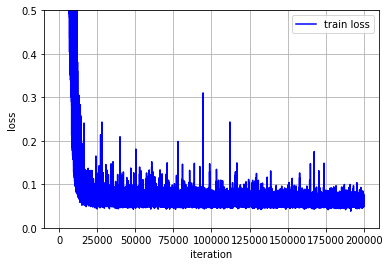

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.plot(loss_vec,c='b',linestyle='solid',label='train loss')
#plt.plot(test_loss_vec,c='r',label='test loss')

#plt.xlim(60000,60100)
plt.ylim(0,0.5)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')
plt.legend()


#print(test_loss_vec[99999])
#print(test_loss_vec[99999])

In [12]:
# 重みの保存
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')


'./model.ckpt'

In [13]:
'''
# ボール座標とスティックの傾きプロット
by_max=IN_train.max(axis=0)[1]
by_min=IN_train.min(axis=0)[1]

ball_y = np.array(range(int(by_min)-3,int(by_max)+3))
for i in range(len(ball_y)):
    
    ball = np.array([[6.0, ball_y[i]/10.0]])
    
    print(ball)
    joy = sess.run(final_output, feed_dict={INPUT: ball})
    plt.scatter(ball[0][1],ball[0][0], s=200, c='orange')
    
    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)
    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)
    print(joy)
    plt.savefig(str(hidden_size)+'_img'+'.png')
    '''

'\n# ボール座標とスティックの傾きプロット\nby_max=IN_train.max(axis=0)[1]\nby_min=IN_train.min(axis=0)[1]\n\nball_y = np.array(range(int(by_min)-3,int(by_max)+3))\nfor i in range(len(ball_y)):\n    \n    ball = np.array([[6.0, ball_y[i]/10.0]])\n    \n    print(ball)\n    joy = sess.run(final_output, feed_dict={INPUT: ball})\n    plt.scatter(ball[0][1],ball[0][0], s=200, c=\'orange\')\n    \n    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)\n    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)\n    print(joy)\n    plt.savefig(str(hidden_size)+\'_img\'+\'.png\')\n    '

In [14]:
# 重みのrestore
predicts_sess = tf.Session(config=config)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(predicts_sess, './model.ckpt')

INFO:tensorflow:Restoring parameters from ./model.ckpt
